# ISYE 6644 Project 1 - Two Person Game 

### March 12, 2021

### Rules of the Game:

I am working on the two player game problem: There are two players, A and B. At the beginning of the game, each starts with 4 coins, and there are 2 coins in the pot. A goes first, then B, then A, ... 
During a particular player's turn, the player tosses a 6 sided die. If the player rolls a:

- 1: then the player does nothing. 
- 2: then the player takes all the coins in the pot.
- 3: then the player takes half of the coins in the pot (rounded down).
- 4, 5, or 6: Then the player puts a coin in the pot. 

A player loses and the game is over if they are unable to perform the task (i.e. if they have 0 coins and need to place one in the pot). We define a cycle as A and then B completing their turns. We would like to determine the expected number of cycles a game will last before a player goes out. 

### Setup the required libraries. 

In [1]:
## import the necessary libraries 
import simpy
import random
import statistics
import math
import numpy as np
import pandas as pd

### Create the simulation, defining a function game()

The cell block below defines the function game(), which will be used to simulate the game and record the output. 

The function initializes each player with 4 coins each, and the pot with 2 coins. 

The function uses the pseudo-random number generator, random.randint(), to roll the die, which has a uniform distribution with each die roll randomly selects a number between 1 and 6 inclusive. 

The function defines the rules of the game, and with each roll updates each player's total coins and the pot's coins. 

The function repeats until one of the players loses, i.e. reaches a negative value of coins. 

The function tracks each die roll, the first roll for each player, the final value of coins for each player and the pot, the winner and loser of each game, and the total number of cycles for each game, and returns all of these values when the game is over. 

In [2]:
#define the function game() which will be used to simulate the game 
def game():
    #initialize each player and the pot 
    A = 4
    B = 4
    Pot = 2
    # initialize the counter for the number of cycles the game has completed 
    reps = 1
    #initialize lists for tracking each players' rolls 
    a_rolls = []
    b_rolls = []
    # define the rules of the game for player A and B, and run until one of them cannot complete their transaction
    # 'while' requires the game to run until one of the players can no longer complete their transaction
    while A >= 0 and B >= 0:
        # die toss for player A using a PRN
        a = random.randint(1,6)
        # if the die toss is 1, then Player A and the Pot remain the same 
        if a == 1:
            A = A
            Pot = Pot
        # if the die toss is 2, then Player A takes all of the coins from the pot, and the pot is now at 0 coins 
        elif a == 2:
            A += Pot
            Pot = 0
        # if the die toss is 3, then Player A takes half of the coins from the pot, rounded down
        elif a == 3:
            A += Pot//2
            Pot -= Pot//2
        # if the die toss is 4, 5, or 6, then Player A puts 1 coin into the pot
        else:
            Pot += 1
            A -= 1
        # append the roll to the a_rolls list, for use in performing analytics later 
        a_rolls.append(a)
        # die toss for Player B using a PRN
        b = random.randint(1,6)
        # if the die toss is 1, then Player B and the pot remain the same
        if b == 1:
            B = B
            Pot = Pot
        # if the die toss is 2, then Player B takes all of the coins from the pot, and the pot is now at 0 coins
        elif b == 2:
            B += Pot
            Pot = 0
        # if the die toss is 3, then player B takes half of the coins from the pot, rounded down 
        elif b == 3:
            B += Pot//2
            Pot -= Pot//2
        # if the die toss is 4, 5, or 6, then Player B puts 1 coin in the pot
        else:
            Pot += 1
            B -= 1
        # append the roll to the b_rolls list, for use in performing analytics later 
        b_rolls.append(b)
        # since a cycle has completed, add 1 to the sum of cycles the game has completed 
        reps += 1
        # check if each player has a negative balance, i.e. they have no coins left and are unable to complete a task
        if A < 0:
            # assign a winner and a loser 
            winner = "B"
            loser = "A"
            total_reps = reps-1
        elif B < 0:
            winner = "A"
            loser = "B"
            total_reps = reps-1
        first_roll_a = a_rolls[0]
        first_roll_b = b_rolls[0]
    # return everything we have been tracking: each roll of the die for each player,
        # the final balance for each player and the pot,
        # the winner and the loser of each game
        # and the total number of cycles that were completed during the game 
    return a_rolls, b_rolls, first_roll_a, first_roll_b,  A, B, Pot, winner, loser, total_reps

### Define another function, game_cycles(), just to track the number of cycles for each game 

This function operates exactly the same as game(), but only returns the number of cycles for each game. This will be used to iterate the simulation, and find the expected value of the number of cycles per game for different numbers of iterations. 

In [3]:
# define a function, game_cycles() to be used to complete different ranges of games in order to produce an expected value 
# this functions the same way as games(), expect it only returns the total number of cycles played for each game 
def game_cycles():
    A = 4
    B = 4
    Pot = 2
    reps = 1
    a_rolls = []
    b_rolls = []
    winner = []
    loser = []
    total_reps = []
    while A >= 0 and B >= 0:
        a = random.randint(1,6)
        if a == 1:
            A = A
            Pot = Pot
        elif a == 2:
            A += Pot
            Pot = 0
        elif a == 3:
            A += Pot//2
            Pot -= Pot//2
        else:
            Pot += 1
            A -= 1
        a_rolls.append(a)
        b = random.randint(1,6)
        if b == 1:
            B = B
            Pot = Pot
        elif b == 2:
            B += Pot
            Pot = 0
        elif b == 3:
            B += Pot//2
            Pot -= Pot//2
        else:
            Pot += 1
            B -= 1
        b_rolls.append(b)
        reps += 1
        if A < 0:
            winner = "B"
            loser = "A"
            total_reps = reps-1
        elif B < 0:
            winner = "A"
            loser = "B"
            total_reps = reps-1
        
    return total_reps

### Create a Pandas data frame to store the games and run a simulation of 10,000 games 

This cell block creates a Pandas data frame to store the information from 10,000 repeated runs of the game() function. The output is the first 5 rows of the Pandas data frame. 

In [4]:
# create a Pandas data frame to store all of the simulations information
# create an index range for the data frame 
index = range(1,10001)
# assign column names 
columns = ["A Roll", "B Roll", "A's First Roll", "B's First Roll", "Final A", "Final B", "Final Pot", "Winner", "Loser", "Total Cycles"]
# create a data frame 
df = pd.DataFrame(index=index, columns=columns)



# simulate the game 10,000 times, and record each output into the dataframe 
for i in range(1, 10001):
    a, b, A_1, B_1, A, B, P, w, l, t = game()
    df['A Roll'][i] = a
    df['B Roll'][i] = b
    df["A's First Roll"][i] = A_1
    df["B's First Roll"][i] = B_1
    df['Final A'][i] = A
    df['Final B'][i] = B
    df['Final Pot'][i] = P
    df['Winner'][i] = w
    df['Loser'][i] = l
    df['Total Cycles'][i] = t
    if i == 10000:
        print("Game ", i, " Complete", "\n")
df.head()

Game  10000  Complete 



,A Roll,B Roll,A's First Roll,B's First Roll,Final A,Final B,Final Pot,Winner,Loser,Total Cycles
1,"[2, 2, 3, 1, 1, 6, 6, 3, 4, 1, 4, 5, 3, 1, 5, ...","[6, 2, 2, 4, 5, 2, 5, 3, 4, 1, 4, 2, 4, 5, 2, ...",2,6,6,-1,5,A,B,52
2,"[5, 5, 4, 5, 1, 3, 4]","[2, 3, 3, 2, 2, 2, 1]",5,2,-1,10,1,B,A,7
3,"[3, 6, 3, 4, 6, 2]","[3, 5, 6, 4, 6, 6]",3,3,10,-1,1,A,B,6
4,"[3, 5, 2, 4, 2, 1, 6, 2, 3, 4]","[2, 1, 6, 4, 6, 4, 5, 3, 3, 4]",3,2,9,-1,2,A,B,10
5,"[6, 4, 3, 6, 3]","[6, 4, 4, 6, 6]",6,6,7,-1,4,A,B,5


### Create a function, expected_cycles(n), which simulates the game n times 

This function will be used to iterate the game n times, and return the average number of cycles per game. 

In [5]:
# create a function, expected_cycles(n)

def expected_cycles(n):
    # initialize a variable to track the average number of cycles played over repeated trials of the game
    total = 0
    # repeat the game_cycles() function n times 
    for i in range(n):
        # track the total number of cycles
        total = total + game_cycles()
    # return the average number of cycles completed over n repeated simulations of the game 
    return total/n

### Use a for loop to iterate the expected_cycles() function 20 times. 

This for loop will iterate the expected_cycles() function 2^n times. Here, n = 20, so the range of games goes from 2 games to 1,048,576 games. You can change n by changing 20 to any number you choose to see what the expected value will be with different values of repeated trials. 

The output here is the average number of trials over 2^n games. 

In [6]:
# use a for loop to repeat the simulation 20 times, with varying levels of n, using 2^n to display that
# for large numbers of n, the average number of cycles played per game approaches 17.5

for i in range(1,20):
    e_v = []
    expected_value = expected_cycles(2**i)
    print(expected_cycles(2**i))
    e_v.append(expected_value)

7.5
21.75
14.5
16.6875
17.46875
14.6875
16.9375
17.81640625
16.708984375
17.208984375
17.4111328125
17.773681640625
17.3519287109375
17.572998046875
17.619049072265625
17.519775390625
17.532875061035156
17.586463928222656
17.55126953125


### Minimum, Maximum, and Mean values of total cycles over 10,000 games. 

In [7]:
print(min(df['Total Cycles']))
print(max(df['Total Cycles']))
print(statistics.mean(df['Total Cycles']))
print(len(df['Total Cycles']))

5
118
17.693
10000


### Histogram of the number of cycles per game over 10,000 games

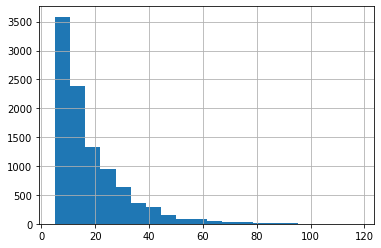

In [8]:
import matplotlib.pyplot as plt
# display a histogram of the number of cycles played for each game 
hist_cycles = df['Total Cycles'].hist(bins=20)
hist_cycles

### Value counts of the number of times Player A and Player B won the game 

In [9]:
# display who won and who lost 
df['Winner'].value_counts()

A    5002
B    4998
Name: Winner, dtype: int64

### Distribution of Player A's Die Rolls, Graphically

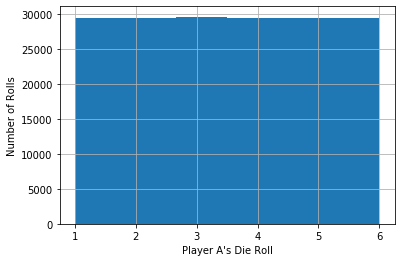

In [10]:
# distribution of Player A's die rolls 
alist =[]
for x in df['A Roll']:
    alist.extend(x)
a_series = pd.Series(alist)
hist_as = a_series.hist(bins = 6)
hist_as.set_xlabel("Player A's Die Roll")
hist_as.set_ylabel("Number of Rolls")
# show histogram
hist_as

### Summary Statistics for Player A's Rolls

In [11]:
a_series.describe()

count    176930.000000
mean          3.500916
std           1.707182
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
dtype: float64

### Distribution of Player A's Rolls, displayed as percentages

In [12]:
# distribution of player A's rolls 
values_a = a_series.value_counts()
values_a/176045

3    0.168287
6    0.167622
2    0.167520
5    0.167514
4    0.167077
1    0.167008
dtype: float64

### Distribution of Player B's Die Rolls, Graphically

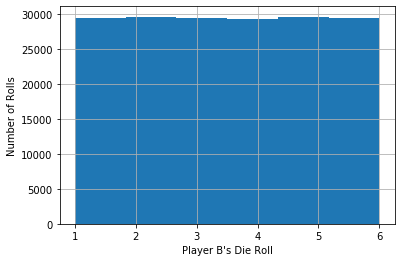

In [13]:
# distribution of Player B's rolls 
blist =[]
for x in df['B Roll']:
    blist.extend(x)
b_series = pd.Series(blist)
hist_bs = b_series.hist(bins = 6)
hist_bs.set_xlabel("Player B's Die Roll")
hist_bs.set_ylabel("Number of Rolls")
hist_bs

### Distribution of Player B's Rolls, displayed as percentages

In [14]:
# distribution of player B's rolls 
values_b = b_series.value_counts()
values_b/176045

2    0.168406
5    0.167940
6    0.167508
1    0.167406
3    0.167156
4    0.166611
dtype: float64

### Summary Statistics of Player B's Die Rolls

In [15]:
b_series.describe()

count    176930.000000
mean          3.499288
std           1.708443
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
dtype: float64

### Box-Plot of Total Cycles over 10,000 Games

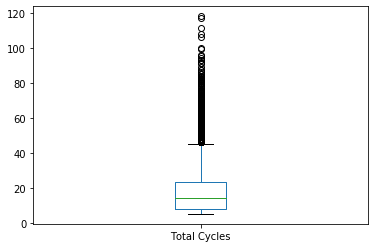

In [16]:
df['Total Cycles'].plot.box()

### Split the Outliers from the Original Data Frame

Output the first 5 rows of the new outliers data frame 

In [17]:
q_low = df["Total Cycles"].quantile(0.01)
q_hi  = df["Total Cycles"].quantile(0.99)

df_outliers_high = df[(df["Total Cycles"] > q_hi)]
df_filtered = df[(df["Total Cycles"] < q_hi)]
print(len(df_outliers_high))
df_outliers_high.head()

99


,A Roll,B Roll,A's First Roll,B's First Roll,Final A,Final B,Final Pot,Winner,Loser,Total Cycles
115,"[3, 5, 2, 4, 2, 1, 4, 3, 6, 1, 3, 2, 6, 1, 6, ...","[2, 3, 1, 1, 5, 5, 5, 4, 2, 1, 3, 5, 1, 3, 4, ...",3,2,-1,11,0,B,A,74
156,"[1, 5, 2, 1, 3, 2, 4, 5, 3, 1, 2, 6, 4, 6, 4, ...","[1, 3, 1, 2, 3, 6, 2, 5, 3, 6, 2, 5, 4, 1, 3, ...",1,1,-1,6,5,B,A,80
220,"[3, 4, 3, 1, 2, 6, 3, 1, 5, 3, 3, 4, 4, 6, 4, ...","[3, 1, 1, 4, 6, 5, 4, 1, 3, 4, 5, 2, 2, 1, 4, ...",3,3,-1,5,6,B,A,86
271,"[1, 6, 3, 3, 3, 3, 3, 1, 4, 2, 6, 1, 2, 2, 6, ...","[6, 2, 2, 3, 6, 6, 6, 4, 1, 4, 1, 3, 6, 5, 3, ...",1,6,-1,9,2,B,A,78
468,"[5, 1, 2, 1, 3, 6, 2, 1, 4, 1, 4, 1, 2, 5, 3, ...","[3, 4, 6, 3, 5, 6, 4, 2, 3, 6, 3, 3, 5, 4, 3, ...",5,3,-1,7,4,B,A,69


### Split the games with 90 or more Total Cycles from the Outliers Data Frame

Display the first few rows of the highest outliers data frame 

In [18]:
highest = df_outliers_high[(df_outliers_high['Total Cycles'] >= 90)]

In [19]:
print(len(highest))
highest

15


,A Roll,B Roll,A's First Roll,B's First Roll,Final A,Final B,Final Pot,Winner,Loser,Total Cycles
472,"[4, 4, 2, 3, 1, 5, 2, 1, 4, 5, 1, 5, 2, 3, 4, ...","[3, 5, 2, 4, 2, 2, 3, 3, 3, 4, 4, 3, 4, 1, 3, ...",4,3,9,-1,2,A,B,91
496,"[2, 2, 2, 2, 5, 1, 1, 2, 4, 3, 5, 3, 2, 2, 6, ...","[6, 2, 2, 2, 5, 4, 3, 5, 2, 2, 2, 3, 2, 3, 2, ...",2,6,9,-1,2,A,B,94
1362,"[4, 6, 1, 3, 6, 6, 3, 5, 2, 2, 5, 1, 6, 5, 6, ...","[6, 5, 1, 2, 5, 5, 2, 5, 2, 3, 2, 1, 4, 6, 4, ...",4,6,5,-1,6,A,B,91
1740,"[6, 6, 1, 2, 6, 4, 5, 4, 1, 5, 4, 3, 4, 2, 3, ...","[5, 5, 1, 5, 3, 6, 1, 3, 3, 1, 2, 5, 5, 3, 3, ...",6,5,8,-1,3,A,B,108
2218,"[5, 5, 3, 1, 5, 5, 1, 2, 1, 4, 3, 4, 3, 4, 4, ...","[4, 3, 5, 2, 3, 4, 1, 6, 4, 6, 4, 5, 2, 6, 1, ...",5,4,6,-1,5,A,B,99
2493,"[3, 3, 2, 5, 1, 3, 3, 5, 5, 4, 6, 6, 2, 2, 6, ...","[2, 3, 6, 3, 6, 1, 2, 3, 3, 2, 6, 1, 4, 3, 2, ...",3,2,-1,10,1,B,A,118
2594,"[4, 3, 6, 5, 5, 4, 3, 4, 2, 6, 3, 3, 5, 4, 1, ...","[3, 2, 4, 4, 1, 5, 1, 3, 4, 2, 1, 2, 6, 2, 1, ...",4,3,-1,1,10,B,A,96
4391,"[2, 2, 1, 5, 3, 5, 3, 2, 3, 5, 1, 2, 6, 4, 6, ...","[6, 1, 2, 5, 2, 6, 1, 3, 1, 3, 2, 1, 3, 6, 3, ...",2,6,6,-1,5,A,B,91
5287,"[3, 3, 3, 5, 2, 3, 5, 4, 3, 5, 6, 5, 5, 3, 5, ...","[1, 2, 4, 1, 6, 3, 6, 5, 2, 5, 1, 4, 1, 2, 4, ...",3,1,7,-1,4,A,B,100
7361,"[1, 2, 5, 2, 2, 2, 3, 4, 2, 2, 6, 4, 3, 5, 2, ...","[3, 3, 6, 3, 5, 6, 3, 5, 1, 5, 2, 4, 2, 3, 5, ...",1,3,8,-1,3,A,B,111


### Distribution of Player A's Die Rolls for Outlier Games

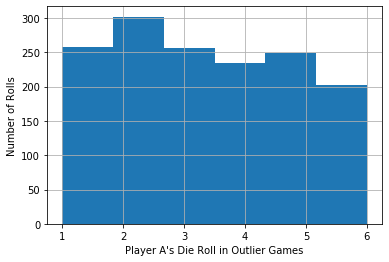

In [20]:
high_alist =[]
for x in highest['A Roll']:
    high_alist.extend(x)
high_a_series = pd.Series(high_alist)
hist_high_a_series = high_a_series.hist(bins = 6)
hist_high_a_series.set_xlabel("Player A's Die Roll in Outlier Games")
hist_high_a_series.set_ylabel("Number of Rolls")
hist_high_a_series

### Distribution of Player B's Die Rolls for Outlier Games

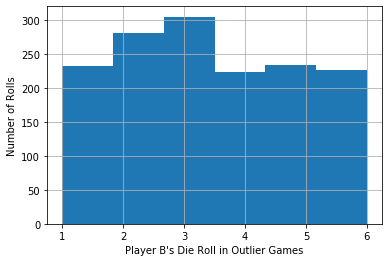

In [21]:
high_blist =[]
for x in highest['B Roll']:
    high_blist.extend(x)
high_b_series = pd.Series(high_blist)
hist_high_b_series = high_b_series.hist(bins = 6)
hist_high_b_series.set_xlabel("Player B's Die Roll in Outlier Games")
hist_high_b_series.set_ylabel("Number of Rolls")
hist_high_b_series

### Summary Statistics of Player A's Die Rolls for Outlier Games

In [22]:
high_a_series.describe()

count    1503.000000
mean        3.347971
std         1.673999
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
dtype: float64

### Distribution of Player A's Die Rolls for Outlier Games, displayed as percentages

In [24]:
values_high_a = high_a_series.value_counts()
values_high_a/1503

2    0.200931
1    0.171657
3    0.170991
5    0.165669
4    0.155689
6    0.135063
dtype: float64

### Summary Statistics of Player B's Die Rolls for Outlier Games

In [25]:
high_b_series.describe()

count    1503.000000
mean        3.414504
std         1.661975
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
dtype: float64

### Distribution of Player B's Die Rolls for Outlier Games, displayed as percentages

In [26]:
values_high_b = high_b_series.value_counts()
values_high_b/1503

3    0.202927
2    0.186959
5    0.155689
1    0.155023
6    0.150366
4    0.149035
dtype: float64

### Distribution of Player A's First Die Roll, Overall

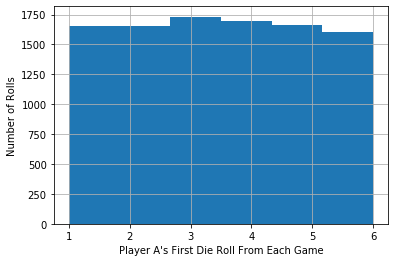

In [27]:
first_roll_a = df["A's First Roll"]
hist_first_roll_a = first_roll_a.hist(bins = 6)
hist_first_roll_a.set_xlabel("Player A's First Die Roll From Each Game")
hist_first_roll_a.set_ylabel("Number of Rolls")
hist_first_roll_a

### Distribution of Player A's First Die Roll Overall, displayed as percentages 

In [28]:
values_roll_a = first_roll_a.value_counts()
values_roll_a/10000

3    0.1732
4    0.1694
5    0.1665
1    0.1655
2    0.1653
6    0.1601
Name: A's First Roll, dtype: float64

### Distribution of Player B's First Die Roll, Overall

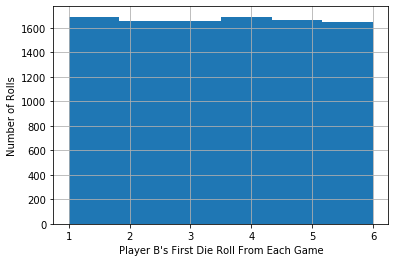

In [29]:
first_roll_b = df["B's First Roll"]
hist_first_roll_b = first_roll_b.hist(bins = 6)
hist_first_roll_b.set_xlabel("Player B's First Die Roll From Each Game")
hist_first_roll_b.set_ylabel("Number of Rolls")
hist_first_roll_b

### Distribution of Player B's First Die Roll Overall, displayed as percentages 

In [30]:
values_roll_b = first_roll_b.value_counts()
values_roll_b/10000

1    0.1691
4    0.1689
5    0.1667
2    0.1653
3    0.1652
6    0.1648
Name: B's First Roll, dtype: float64

### Average Cycles per Game where A's First Roll was a 4, 5, or 6

In [42]:
df_A_first_roll_456 = df[(df["A's First Roll"] > 3)]
print(statistics.mean(df_A_first_roll_456['Total Cycles']))

16.63064516129032


### Average Cycles per Game where A's First Roll was a 1, 2, or 3

In [43]:
df_A_first_roll_123 = df[(df["A's First Roll"] < 4)]
print(statistics.mean(df_A_first_roll_123['Total Cycles']))

18.738492063492064


### Average Cycles per Game where A's First Roll was a 1

In [44]:
df_A_first_roll_1 = df[(df["A's First Roll"] == 1)]
print(statistics.mean(df_A_first_roll_1['Total Cycles']))

18.35105740181269


### Average Cycles per Game where A's First Roll was a 1

In [45]:
df_B_first_roll_1 = df[(df["B's First Roll"] == 1)]
print(statistics.mean(df_B_first_roll_1['Total Cycles']))

18.33530455351863


### Average Cycles per Game where A's First Roll was a 4, 5, or 6

In [46]:
df_B_first_roll_456 = df[(df["A's First Roll"] > 3)]
print(statistics.mean(df_B_first_roll_456['Total Cycles']))

16.63064516129032


### Average Cycles per Game where A's First Roll was a 1, 2, or 3

In [47]:
df_B_first_roll_123 = df[(df["A's First Roll"] < 4)]
print(statistics.mean(df_B_first_roll_123['Total Cycles']))

18.738492063492064


### Distribution of Player A and Player B's First Rolls Where the Total Number of Cycles per Game is between 15 and 19

In [48]:
avg_cycles = df[(df["Total Cycles"] <= 19) & (df["Total Cycles"] >= 15)]
print(avg_cycles["A's First Roll"].value_counts()/1543)
print(avg_cycles["B's First Roll"].value_counts()/1543)

2    0.197019
3    0.182761
1    0.162022
6    0.147116
4    0.144524
5    0.134154
Name: A's First Roll, dtype: float64
2    0.178224
1    0.173040
3    0.171095
4    0.154245
6    0.149060
5    0.141931
Name: B's First Roll, dtype: float64


### Distribution of Player A and Player B's First Rolls Where the Total Number of Cycles per Game is Greater Than 19

In [38]:
high_cycles = df[(df["Total Cycles"] > 19)]
print(high_cycles["A's First Roll"].value_counts()/3127)
print(high_cycles["B's First Roll"].value_counts()/3127)

3    0.189639
2    0.182603
1    0.172689
4    0.157659
5    0.154141
6    0.152223
Name: A's First Roll, dtype: float64
3    0.192837
1    0.185161
2    0.182283
6    0.153502
5    0.147745
4    0.147426
Name: B's First Roll, dtype: float64


### Distribution of Player A and Player B's First Rolls Where the Total Number of Cycles per Game is Less than 15

In [39]:
low_cycles = df[(df["Total Cycles"] < 15)]
print(low_cycles["A's First Roll"].value_counts()/5330)
print(low_cycles["B's First Roll"].value_counts()/5330)

4    0.183490
5    0.183114
6    0.168480
1    0.162289
3    0.160788
2    0.145966
Name: A's First Roll, dtype: float64
4    0.185741
5    0.184991
6    0.175985
1    0.158537
2    0.151595
3    0.147280
Name: B's First Roll, dtype: float64
